## Quadratic Optimization

# Introduction

* It is very common to have to minimize a quadratic function in finance

* Example: Min Variance porfolio
  * Given a set of assets $(X_n)_{n \in [1,N]}$
  * Expected return $(R_n)_{n \in [1,N]}$
  * Covariance Matrix $\Omega$
  * Find the portfolio $(\omega_n)_{n \in [1,N]}$ with the minimal variance with a target return
  $$\min_{(\omega_n)_{n \in [1,N]} \in \mathbb{R}^N} <\omega | \Omega | \omega>$$
  \begin{align}
  \sum_{n=1}^N \omega_n & = 1 \\
  \sum_{n=1}^N \omega_n R_n & \geq R\\
  \forall n, \omega_n & \geq 0
  \end{align}
  

In Python a usefull module is CVXPY

There are two parts in an optimization problem
* The objective function
* The constraints

The variable
* Start by defining the variable
* In our example : $\omega \in \mathbb{R}^N$
* In Python:

In [ ]:
import numpy as np
import pandas as pd
import cvxpy as cp

In [ ]:
x = cp.Variable(250)

# The constraints

* How to code constraint in CVXPY

* Inequalities
  * Inequalities can only be $\leq$
  * $\omega_n \geq 0$ must be coded as $-\omega_n \leq 0$
  * Gather all the inequalities constraints into a big matrix $G$ and a threshold vector $h$

  $$G.\omega \leq h$$
  * meaning for each line $i$ of the matrix $G$
  $$\sum_{n=1}^N G_{i,n} \omega_n \leq h_i$$

  *Example:
  $$\forall n, \omega_n \geq 0$$
  becomes
  $$(-\mathbb{1}_N).\omega \leq 0$$

  * For cvxpy:
  G @ x <=h

In [ ]:
G = -np.identity(250)
h = np.zeros(250)
G @ x <= h

Inequality(Expression(AFFINE, UNKNOWN, (250,)))

* Equality
  * To code an equality constraint use a matrix $A$ and a vector $b$ such that
  $$A.\omega = b$$
  * Meaning for each line $i$ of $A$:
  $$\sum_{n=1}^N A_{i,n}\omega_n = b_i$$
  * A @ x == b
  * Example
  $$\sum_{n=1}^N \omega_n = 1$$
  
  becomes


In [ ]:
A = np.ones((1,250))
b = np.ones(1)
A @ x == b

Equality(Expression(AFFINE, UNKNOWN, (1,)), Constant(CONSTANT, NONNEGATIVE, (1,)))

* Norms
  * CVXPY gives the norms 1 and 2 functions
  * $||\omega||_1 = \sum_{n=1}^N |\omega_n|$
  * $||\omega||_2 = \sqrt{\sum_{n=1}^N |\omega_n|^2}$

  * $||\omega||_1 == 100$ becomes

In [ ]:
cp.norm1(x) == 100

Equality(Expression(CONVEX, NONNEGATIVE, ()), Constant(CONSTANT, NONNEGATIVE, ()))

 * $||\omega||_2 == 100$ becomes

In [ ]:
cp.norm2(x) == 100

Equality(Expression(CONVEX, NONNEGATIVE, ()), Constant(CONSTANT, NONNEGATIVE, ()))

* Combining constraints
 * Say we have
 \begin{align}
 G_1.\omega & \leq h_1 \\
 G_2.\omega & \leq h_2
 \end{align}

 * It becomes

In [ ]:
G1 = np.random.rand(100,250)
G2 = np.random.rand(20,250)
h1 = np.random.rand(100,1)
h2 = np.random.rand(20,1)
G = np.vstack([G1,G2])
h = np.vstack([h1,h2]).flatten() #need to flatten for cvxpy
G@x <= h

Inequality(Expression(AFFINE, UNKNOWN, (120,)))

# The objective

* Quadratic form
 * $<\omega | \Omega |\omega>$ becomes

In [ ]:
Returns = np.random.rand(1000,250)
Covariance = pd.DataFrame(Returns).cov().values
cp.quad_form(x, Covariance)

Expression(CONVEX, NONNEGATIVE, (1, 1))

# Whole Problem

In [ ]:
prob = cp.Problem(cp.Minimize(cp.quad_form(x, Covariance)),
                  [G @ x <= h,
                   A @ x == b])

In [ ]:
prob.solve()

0.02424378655623024

In [ ]:
x.value

array([-3.61669840e-04,  2.29399584e-02,  2.26188342e-02,  3.56551546e-02,
        1.79090037e-03,  6.76691273e-02,  4.68520152e-02,  3.11610143e-03,
        3.80218019e-02,  1.19369547e-02, -6.47208733e-02,  3.16319814e-02,
       -2.33091977e-02, -2.02567832e-02, -4.14575855e-02,  6.25800319e-02,
       -7.20241556e-02,  1.73233604e-02,  8.15198095e-02,  2.68436177e-03,
       -4.39690725e-02, -3.66908995e-02, -1.59633427e-02, -7.88619693e-02,
        6.62772464e-02,  1.57586642e-02,  4.21193906e-02,  5.28513135e-02,
       -7.92424305e-02,  2.87222010e-02,  1.73841175e-02, -2.12986492e-02,
       -2.27998550e-02,  3.69173859e-02, -4.12260308e-02,  7.32808413e-02,
       -2.56920380e-02,  5.50018245e-02,  1.24106990e-04, -3.44273668e-02,
        2.75159284e-02, -2.00928693e-02,  1.73965538e-02,  5.42425448e-02,
       -1.83086260e-02,  2.71051045e-02, -2.44599258e-02,  5.50141501e-02,
        7.05890031e-03,  3.99206012e-02,  4.58940468e-02, -3.41009451e-03,
        6.07907406e-02,  

In [ ]:
x.shape

(250,)

#Question 1
* Use the Yahoo data

In [ ]:
import datetime
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2018, 1, 1)

tickers = ['AAPL', 'ADBE', 'ORCL', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM', 'SPY']

* Expected return : return on the period
* Covariance: covariance on the period
* Compute the min variance porfolio for various expected return

In [ ]:
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [ ]:
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2018, 1, 1)

tickers = ['AAPL', 'ADBE', 'ORCL', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM', 'SPY']


df = pdr.get_data_yahoo(tickers, start, end)['Adj Close']
df.tail()

[*********************100%%**********************]  11 of 11 completed


,AAPL,ADBE,AMD,EBAY,HPQ,IBM,JNPR,MSFT,ORCL,QCOM,SPY
Date,,,,,,,,,,,
2017-12-22,41.372990,175.000000,10.54,34.781143,17.779009,109.292274,24.169619,79.818306,42.944382,54.806801,242.913681
2017-12-26,40.323353,174.440002,10.46,34.946953,17.753918,109.528740,24.169619,79.715614,43.007858,54.442719,242.623108
2017-12-27,40.330448,175.360001,10.53,34.642982,17.787371,109.743736,24.186369,80.004990,42.962521,54.645939,242.741089
2017-12-28,40.443920,175.550003,10.55,34.928524,17.687021,110.395912,24.177999,80.014320,43.089470,54.510452,243.240494
2017-12-29,40.006569,175.240005,10.28,34.762726,17.569941,109.951546,23.868126,79.846283,42.871834,54.205631,242.323380


In [ ]:
def min_variance(expected_return):
  n = len(df.columns)
  R = (df.iloc[-1] - df.iloc[0]) / df.iloc[0]
  COV = df.pct_change().cov()
  G = np.vstack([-np.identity(n),-R.values.reshape(1,n)])
  h = np.vstack([np.zeros((n,1)),-np.ones((1,1))*expected_return])
  A = np.ones((1,n))
  b = np.ones(1)
  x = cp.Variable(n)
  prob = cp.Problem(cp.Minimize(cp.quad_form(x, COV)),
                  [G @ x <= h.flatten(),
                    A @ x == b])
  prob.solve()
  X= pd.Series(x.value,R.index)
  C = pd.Series(np.diag(COV),R.index)
  Y = pd.concat([R,C.apply(np.sqrt)*10000,X],axis=1)
  Y.columns = ['Return', 'Volatility', 'Weight']
  return Y

In [ ]:
X = min_variance(3.5)

In [ ]:
X

,Return,Volatility,Weight
AAPL,1.385732,150.217954,1.824523e-18
ADBE,3.570683,152.385033,9.166528e-01
AMD,3.063241,377.682171,3.024632e-02
EBAY,0.673264,156.680655,3.386457e-18
HPQ,2.524259,190.844904,3.499286e-02
IBM,-0.091470,116.903623,4.477225e-18
JNPR,0.464122,179.267777,3.580642e-18
MSFT,2.537009,140.822335,1.810806e-02
ORCL,0.454119,128.383084,3.638184e-18
QCOM,0.143091,159.500792,4.278459e-18


<Axes: >

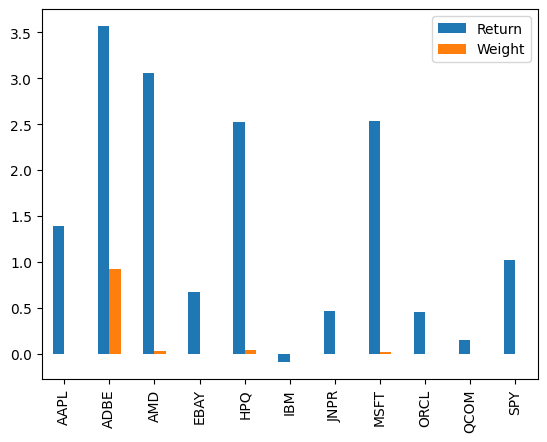

In [ ]:
X[['Return','Weight']].plot(kind='bar')

* How is the return of a stock and the weight correlated?
* How is the volatility of a stock and the weight correlated?
* How does it evolve with the demanded return?

In [ ]:
X.corr()

,Return,Volatility,Weight
Return,1.000000,0.477755,0.591469
Volatility,0.477755,1.000000,-0.027354
Weight,0.591469,-0.027354,1.000000


# Question 2: Daily rebalance of a Long Short Portfolio



* Load the returns of the stocks
* Load the sectors file

* The sector is a multidigit number
* Each two digits is a finer sectorization
* Example:
  * "Finance" will be coded by the first two digits
  * Inside "Finance", "Banks" will be coded by the second 2 digits
  * Insidde "Banks", the geographic span will be coded by the third 2 digits
* Here we consider only the first 2 digits

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/vinci/quadratic")

In [1]:
import pandas as pd
returns = pd.read_pickle(r"C:\Users\Asus\OneDrive\Documents\ESILV\A5\Algo Trading\TD7 portfolio optimization\returns.pandas")
sector = pd.read_pickle(r"C:\Users\Asus\OneDrive\Documents\ESILV\A5\Algo Trading\TD7 portfolio optimization\sector.pandas")
compo = pd.read_pickle(r"C:\Users\Asus\OneDrive\Documents\ESILV\A5\Algo Trading\TD7 portfolio optimization\compo.pandas")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Asus\\OneDrive\\Documents\\ESILV\\A5\\Algo Trading\\TD7 portfolio optimization\\returns.pandas'

* Every day the expected return of the stocks changes
* We want to rebalance our portfolio daily
* We have constraints:
   * Each stock cannot trade more than 1 unit par day (buy or sell)
   * Each holding cannot be more than 5 units
   * We want to be sector neutral: the sum of the holdings in each sector must be zeros
   * The sum of the absolute value of our holdings must be less than 100. We say our GMV (growth market value) is less than 100.
   * Only stock with an expected return or with a previous day position non null can have a non null position today

* We start with an empty portfolio
* At each day d we look at the expected return
* Compute our target porfoltio
* Trade the difference between current porfolio and next portfolio at d+1 at the close

First Step: Compute the portfolio that maximize our expected return while respecting all the constraint every day

if ex is the expected returns per stocks, the expected returns of the portfolio is ex.T @ x

* Expected return of the portfoliot $(\omega_n)$ is
$$ <expected|\omega>$$

* Prepare the sector matrix

In [ ]:
sector

,SECTOR
ticker,
1448062D UW Equity,50
1518855D US Equity,50
1697067D UN Equity,15
1715651D UN Equity,15
1856613D UN Equity,15
...,...
USB UN Equity,40
V UN Equity,40
VLO UN Equity,10


In [ ]:

# First make the sector matrix
sector_d = {}
sector = sector.applymap(lambda x:x[:2])
E = sector.groupby('SECTOR')
SECTOR = pd.concat([pd.Series(1,LIST) for LIST in E.groups.values()],axis=1).fillna(0).T
SECTOR.index = list(E.groups.keys())
SECTOR = SECTOR.reindex(columns=returns.columns)

In [ ]:
SECTOR

ticker,1448062D UW Equity,1518855D US Equity,1697067D UN Equity,1715651D UN Equity,1856613D UN Equity,1922150D UN Equity,2258717D UN Equity,AAL UW Equity,AAPL UW Equity,KDP UW Equity,...,XOM UN Equity,YUM UN Equity,ZM UW Equity,ZTS UN Equity,UPS UN Equity,USB UN Equity,V UN Equity,VLO UN Equity,VMW UN Equity,VRTX UW Equity
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* The expected returns is the opposite of the past 5 days returns
* it is 0 if the stock is not in the compo

In [ ]:
EXPECTED = -(returns.rolling(5).mean().fillna(0) * compo).reindex_like(returns).fillna(0)

In [ ]:
EXPECTED

ticker,1448062D UW Equity,1518855D US Equity,1697067D UN Equity,1715651D UN Equity,1856613D UN Equity,1922150D UN Equity,2258717D UN Equity,AAL UW Equity,AAPL UW Equity,KDP UW Equity,...,XOM UN Equity,YUM UN Equity,ZM UW Equity,ZTS UN Equity,UPS UN Equity,USB UN Equity,V UN Equity,VLO UN Equity,VMW UN Equity,VRTX UW Equity
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.000000
2015-01-05,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.000000
2015-01-06,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.000000
2015-01-07,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.000000,...,-0.000000,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,-0.000000
2015-01-08,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.000000,-0.000000,...,0.000000,-0.0,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.0,0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.010581,-0.002428,...,-0.006201,-0.0,0.012542,-0.010228,-0.008231,-0.003656,-0.005497,-0.0,-0.002607,-0.007205
2021-12-28,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.011051,-0.004989,...,-0.008453,-0.0,0.014685,-0.008437,-0.011859,-0.006778,-0.008847,-0.0,-0.004322,-0.006025
2021-12-29,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.007334,-0.007046,...,-0.002173,-0.0,0.018283,-0.007827,-0.007170,-0.002714,-0.002595,-0.0,-0.003455,-0.004316


<Axes: xlabel='date'>

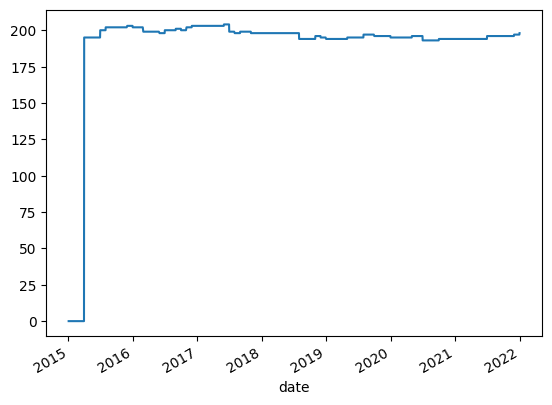

In [ ]:
compo.sum(axis=1).plot()

In [ ]:
def new_position(previous_position, expected_return):
  n = len(expected_return)
  G1 = np.identity(n)
  h1 = (previous_position + 1).apply(lambda x:min(x,5)).values.reshape((n,1))
  G2 = -np.identity(n)
  h2 = -(previous_position - 1).apply(lambda x:max(x,-5)).values.reshape((n,1))
  G = np.vstack([G1,G2])
  h = np.vstack([h1,h2]).flatten()
  q=previous_position.abs() +  expected_return.abs()
  null = [i for i,s in enumerate(previous_position.index) if q.xs(s) == 0]
  A1 = np.zeros((len(null),n))
  for j,i in enumerate(null):
    A1[j,i] = 1
  b1 = np.zeros((len(null),1))
  A2 = SECTOR.values
  b2 = np.zeros((len(A2),1))
  A = np.vstack([A1,A2])
  b = np.vstack([b1,b2]).flatten()
  ex = expected_return.values
  x=cp.Variable(n)
  prob = cp.Problem(cp.Minimize(-ex.T @ x),
                  [G @ x <= h,
                    A @ x == b,
                    cp.norm1(x) <= 100])

  prob.solve()
  return pd.Series(x.value,previous_position.index)


In [ ]:
pose=[]
pose.append(pd.Series(0,returns.columns))
for d in returns.index[1:]:
  pose.append(new_position(pose[-1], EXPECTED.xs(d)))
POSE = pd.concat(pose,axis=1).T
POSE.index=returns.index

In [ ]:
POSE

ticker,1448062D UW Equity,1518855D US Equity,1697067D UN Equity,1715651D UN Equity,1856613D UN Equity,1922150D UN Equity,2258717D UN Equity,AAL UW Equity,AAPL UW Equity,KDP UW Equity,...,XOM UN Equity,YUM UN Equity,ZM UW Equity,ZTS UN Equity,UPS UN Equity,USB UN Equity,V UN Equity,VLO UN Equity,VMW UN Equity,VRTX UW Equity
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2015-01-05,7.691943e-31,-7.917961e-32,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2015-01-06,-3.768314e-17,2.216655e-18,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2015-01-07,-3.768314e-17,2.216655e-18,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2015-01-08,-3.768314e-17,2.216655e-18,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1.336800e-10,1.336800e-10,0.333333,0.333333,0.333333,0.333333,1.333333e+00,2.857143e-01,-5.214683e-11,-3.320899e-12,...,1.217333e-11,1.00,-1.538659e-09,-6.400051e-11,-1.015422e-11,2.632135e-11,4.275321e-12,1.250000e-01,1.007848e-10,-1.127795e-11
2021-12-28,7.291401e-11,7.291401e-11,0.666667,0.666667,0.666667,0.666667,1.500000e+00,5.714286e-01,-1.273253e-11,-1.206281e-11,...,-1.216507e-11,2.00,1.000000e+00,7.631507e-13,-1.933845e-11,1.883411e-11,3.039766e-12,1.066483e-10,4.854753e-11,1.893770e-11
2021-12-29,6.581126e-11,6.581126e-11,1.166667,1.166667,1.166667,1.166667,8.333333e-01,4.285714e-01,-4.174500e-11,-4.602135e-11,...,1.781276e-11,2.00,2.000000e+00,-6.752523e-11,-3.706181e-11,1.186531e-11,1.391669e-11,8.477079e-11,3.115818e-11,1.005660e-11


Draw the PnL

<Axes: xlabel='date'>

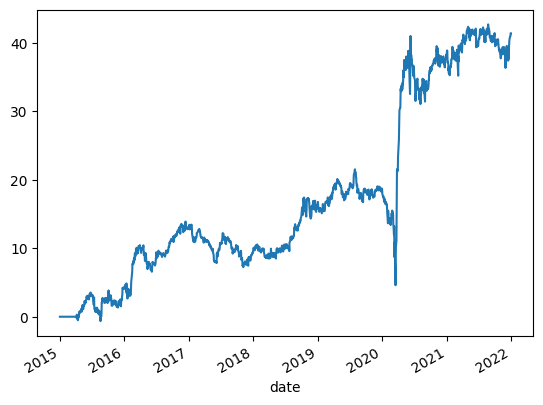

In [ ]:
PnL = (POSE.shift(2)*returns).sum(axis=1)
PnL.cumsum().plot()

<Axes: xlabel='date'>

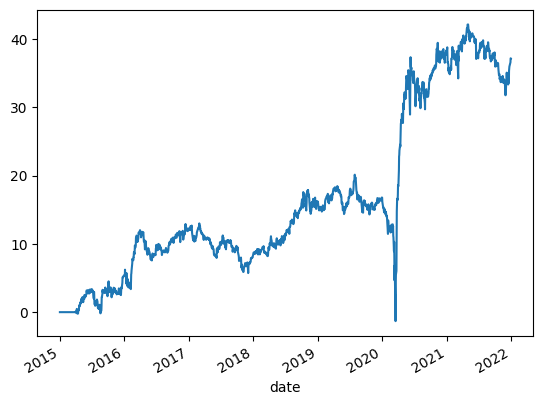

In [ ]:
PnL = (POSE.shift()*returns).sum(axis=1)
PnL.cumsum().plot()

<Axes: xlabel='date'>

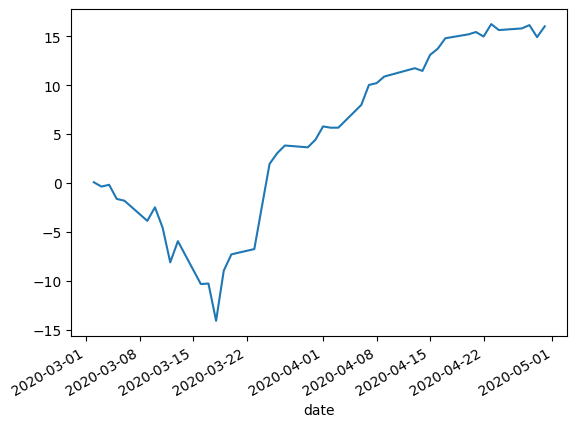

In [ ]:
PnL.loc['2020-03':'2020-04'].cumsum().plot()


* Check the constraints are respected

In [1]:
POSE.diff().abs().sum(axis=1).plot()

NameError: name 'POSE' is not defined

<Axes: xlabel='date'>

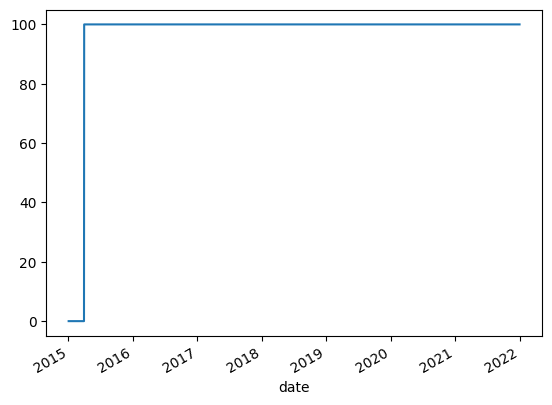

In [ ]:
POSE.abs().sum(axis=1).plot()

<Axes: xlabel='date'>

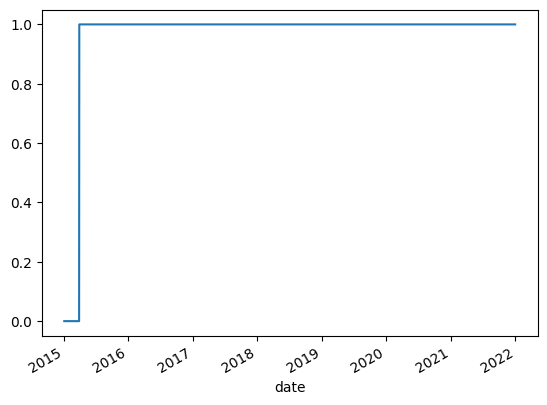

In [ ]:
POSE.diff().abs().max(axis=1).plot()

<Axes: xlabel='date'>

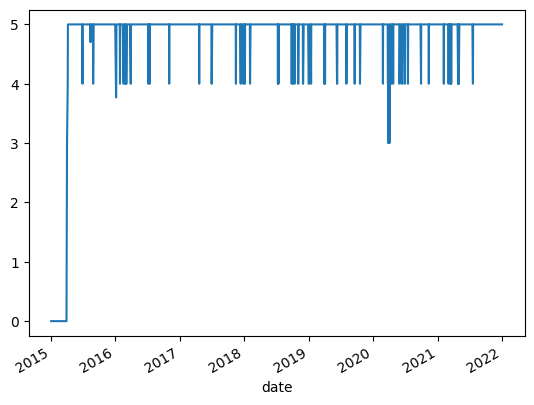

In [ ]:
POSE.abs().max(axis=1).plot()

In [ ]:
POSE.groupby(sector['SECTOR'],axis=1).sum().abs().sum().sum()

7.507727223146845e-08

In [ ]:
POSE.groupby(sector['SECTOR'],axis=1).sum()

SECTOR,10,15,20,25,30,35,40,45,50,55,60
date,,,,,,,,,,,
2015-01-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2015-01-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.768591e-31,0.000000e+00,0.000000e+00
2015-01-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.265492e-31,0.000000e+00,0.000000e+00
2015-01-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.265492e-31,0.000000e+00,0.000000e+00
2015-01-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.265492e-31,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,3.035433e-12,3.038236e-12,3.044601e-12,-1.597744e-11,-4.520036e-12,-3.036002e-12,-6.568701e-12,3.722969e-11,1.433523e-12,9.012332e-15,-5.094162e-15
2021-12-28,1.877312e-12,9.517983e-14,9.515863e-14,2.569944e-12,-9.571699e-14,-2.886140e-13,9.475813e-14,9.428514e-14,-9.447591e-14,2.826534e-14,-2.319186e-16
2021-12-29,4.822734e-15,5.355022e-14,5.032046e-14,5.062617e-14,-4.485946e-14,-3.679437e-13,-5.357235e-14,3.862985e-14,-7.463013e-12,-1.262626e-14,4.336158e-15


* The trading might be costly due to transaction cost and slippage (difference between close price and execution price)

* We modelize the cost by $$\epsilon ||x-x_0||_1$$

* $\epsilon$ depends on the market
* $x_0$ is the previous day position
* Add the cost to the objective function in step 1 and draw the PnL for various $\epsilon$ minus the cost

* Replace the sector neutrality by a covariance penalization
* Meaning : add a $\lambda <x|COV|x>$ to your objectif function with various $\lambda$
* $COV$ must be computed daily